In [1]:
import sys; sys.path.append('/sj0243/')

In [3]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[3] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'

calc_errors = True

AllModels.clear()
Xset.parallel.error = 20



pd.set_option('display.max_columns', 500)

# prod_shift = 0  #0 or 1

# if prod_shift == 0:
#     prodpath_ph_res = 'phase_resolved' 
# elif prod_shift == 1:
#     prodpath_ph_res = 'phase_resolved_shift_1' 


###
Observation 90302319008 loaded successfully


# Observation 90302319004

## Phase-averaged spectra

### cutoffpl (2 gauss, one bb)

Model: constant*phabs(gaussian + gaussian + edge(cutoffpl + bbodyrad))

P#   C#   Component    Parameter  Unit    Value           Errors      
----------------------------------------------------------------------------
1    1    constant     factor             1.0                           (0.0       , 0.0       )
2    2    phabs        nH         10^22   0.8                           (0.0       , 0.0       )
3    3    gaussian     LineE      keV     6.4                           (0.0       , 0.0       )
4    3    gaussian     Sigma      keV     1.6                           (0.0       , 0.0       )
5    3    gaussian     norm               1.4                           (0.0       , 0.0       )
6    4    gaussian_4   LineE      keV     6.67                          (0.0       , 0.0       )
7    4    gaussian_4   Sigma      keV     0.05                          (0.0       , 0.0       )
8    4    gaussian_4   norm               0.03                          (0.0       , 0.0       )
9   

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319008_cutoffpl_FPMA,constant,factor,1,1.0,0.0,0.0,FFFFFFFFF,0.0,True,
1,0,90302319008_cutoffpl_FPMA,phabs,nH,2,0.8,0.0,0.0,FFFFFFFFF,0.0,True,
2,0,90302319008_cutoffpl_FPMA,gaussian,LineE,3,6.4,0.0,0.0,FFFFFFFFF,0.0,True,
3,0,90302319008_cutoffpl_FPMA,gaussian,Sigma,4,1.755246,1.737431,1.772949,FFFFFFFFF,0.016782,False,
4,0,90302319008_cutoffpl_FPMA,gaussian,norm,5,0.23989,0.233667,0.246053,FFFFFFFFF,0.005999,False,
5,0,90302319008_cutoffpl_FPMA,gaussian_4,LineE,6,6.67,0.0,0.0,FFFFFFFFF,0.0,True,
6,0,90302319008_cutoffpl_FPMA,gaussian_4,Sigma,7,0.05,0.0,0.0,FFFFFFFFF,0.0,True,
7,0,90302319008_cutoffpl_FPMA,gaussian_4,norm,8,0.001412,0.000943,0.001883,FFFFFFFFF,0.000464,False,
8,0,90302319008_cutoffpl_FPMA,edge,edgeE,9,7.1,0.0,0.0,FFFFFFFFF,0.0,True,
9,0,90302319008_cutoffpl_FPMA,edge,MaxTau,10,0.128869,0.123122,0.134582,FFFFFFFFF,0.005581,False,


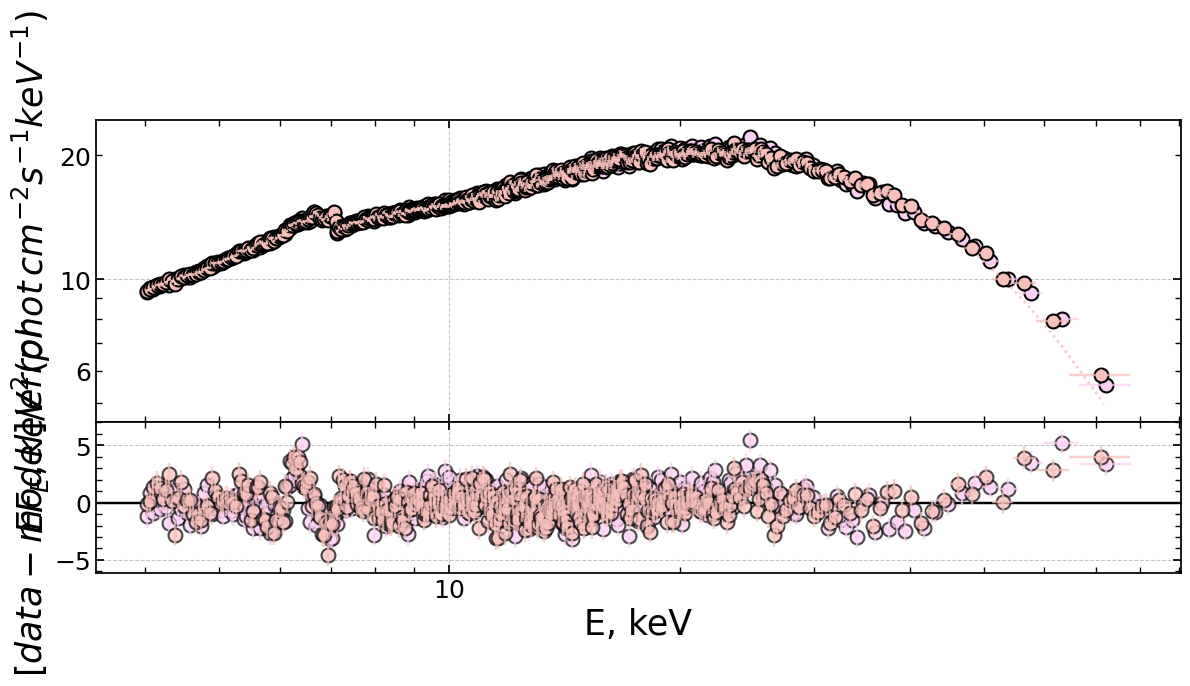

In [3]:
os.chdir(ph_ave_folder)
create_dir('xspec')


mo_cutoffpl = Model("constant*phabs*( gaussian  + gaussian +edge*(cutoffpl+bbodyrad))")
mo_cutoffpl.phabs.nH = '0.8 -1'

mo_cutoffpl.cutoffpl.PhoIndex = '1.3'
mo_cutoffpl.cutoffpl.HighECut = '20' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.cutoffpl.norm = '10'

mo_cutoffpl.bbodyrad.kT = '0.8'
mo_cutoffpl.bbodyrad.norm = '4e3' # ,, 0.1, 0.2, 3, 4'


mo_cutoffpl.gaussian.LineE = '6.4 -1'
mo_cutoffpl.gaussian.Sigma = '1.6 ' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian.norm = '1.4'

mo_cutoffpl.gaussian_4.LineE = '6.67 -1'
mo_cutoffpl.gaussian_4.Sigma = '0.05 -1' # ,, 0.1, 0.2, 3, 4'
mo_cutoffpl.gaussian_4.norm = '0.03'

mo_cutoffpl.edge.edgeE = '7.1 -1 ,, 6,6.5,7.5,8' #this is like setting nh with hard and soft limits limits:  newpar 2 ,,0.3,0.3,2,2
mo_cutoffpl.edge.MaxTau = '0.1 '
#mo_cutoffpl.smedge.index = '0 -1 '
#mo_cutoffpl.smedge.width = '0.1 -1 '
showmodel(mo_cutoffpl)



model = mo_cutoffpl
model_name = 'cutoffpl'
mo_fid_pars = fit_spectra(model = model, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors)
mo_fid_pars

## Phase-resolved spectra

### cutoffpl (2 gauss, one bb)

#### fit

In [4]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/cutoffpl/xcm/{ObsID}_cutoffpl.xcm_model')
mo_cutoffpl_loaded = AllModels(1)
mo_cutoffpl_loaded.gaussian_4.norm.frozen = True
mo_cutoffpl_loaded.gaussian.Sigma.frozen = True
#mo_cutoffpl_loaded.gsmooth.Sig_6keV.frozen = True

#showmodel(mo_cutoffpl_loaded);

##################### bin number 4 #####################
deleted xspec/cutoffpl/*90302319008_bin4_shift0_cutoffpl* and xspec/cutoffpl/xcm/*90302319008_bin4_shift0_cutoffpl* files
Try loading storage xspec/cutoffpl/90302319008_bin4_shift0_cutoffpl.storage
no storage found. fitting...
 loaded phase_resolved_bin4A_sr.pi and phase_resolved_bin4B_sr.pi from /sj0243/results/out90302319008/products/phase_resolved
perturbing ininital guess before fitting
fitting done
skipping errors for: []
    16     0.992472     0.997017    (-0.00226849,0.00227609)
     5     0.167197     0.191081    (-0.0120412,0.0118432)
    10     0.105244     0.121046    (-0.00824672,0.00755582)
    11     0.991546      1.03835    (-0.0238124,0.0229937)
    12       18.866      19.7172    (-0.421523,0.429674)
    13      3.03219      3.32577    (-0.146333,0.147246)
    14     0.457175     0.611115    (-0.0756862,0.0782538)
Fit done 
 chi2 = 1641.2109849380931 for 1677 dof, chi2_red = 0.9786589057472231, H0 prob = 0.72936

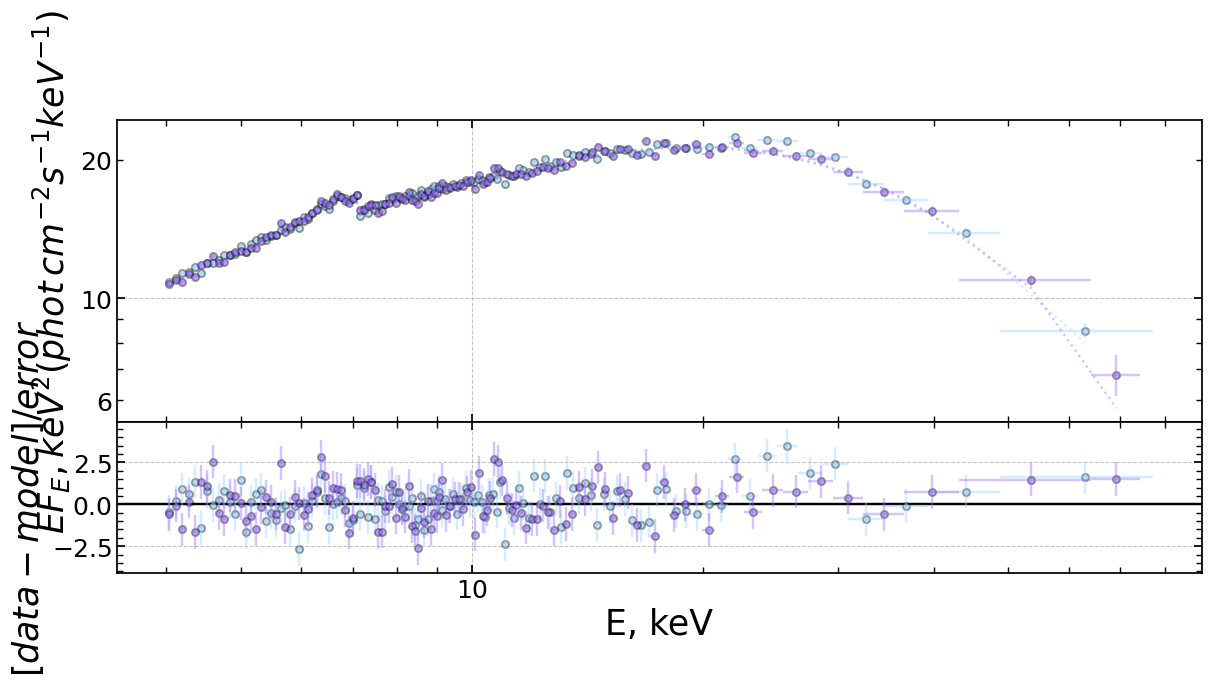

In [5]:
os.chdir(ph_res_folder)
create_dir('xspec')

model = mo_cutoffpl_loaded
model_name = 'cutoffpl'
for binnum in range(4,5):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors, perturb_fit_sigma=0.1)


#### plot results

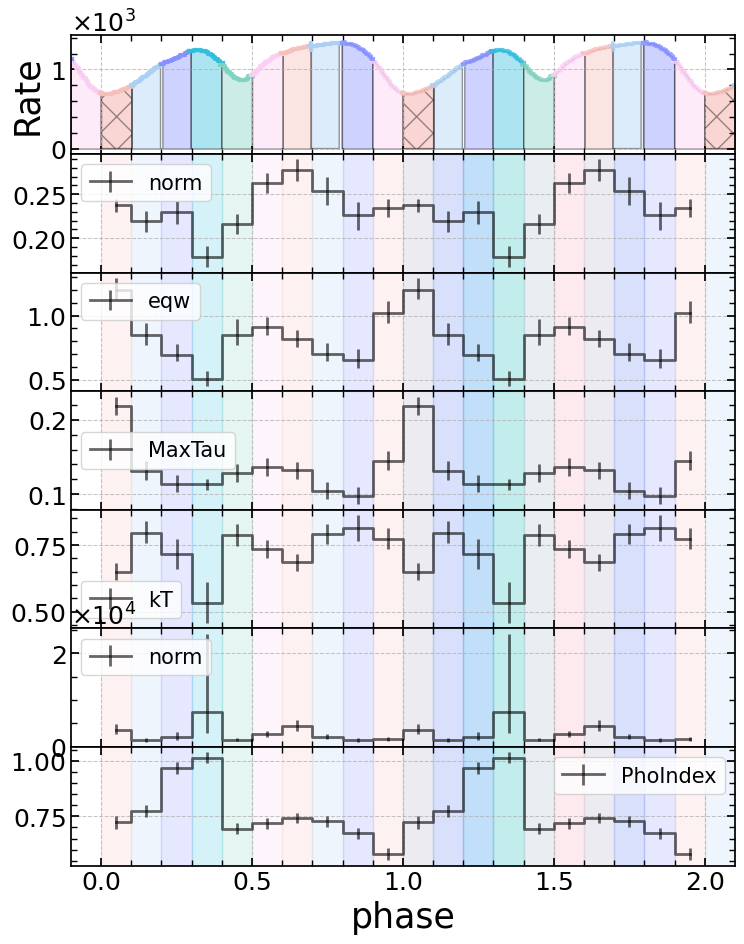

In [6]:
os.chdir(ph_res_folder)
model_name = 'cutoffpl'
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
ph_res_results_reind.head(25)



fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(7, sharex=True, figsize  = (8, 10))


efolds = glob('*.efold')
_, phase_colors = nu_obs.check_efold_of_bins(prodpath='phase_resolved', efolds_files = efolds, fiducial = None , ax_efold = ax0, fig = fig, save = False, legend=False, phase_zero_efold='phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold')



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]
ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', colors = phase_colors, lw = 2, ax = ax1)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'gaussian',     par =  'eqw', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2,  colors = phase_colors, ax = ax2)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'edge',     par =  'MaxTau', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors, ax = ax3)


df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'kT', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax4)

df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'bbodyrad',     par =  'norm', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2,  colors = phase_colors, ax = ax5)



df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = model_name,    comp = 'cutoffpl',     par =  'PhoIndex', shift = prod_shift)
title = title.rsplit('.', 1)[1]

ph_res_param(df, label = title,  funct = lambda x: x, alpha = 0.6, color = 'k', lw = 2, colors = phase_colors,  ax = ax6)



fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
fig.savefig(f'xspec/{model_name}/ph_res_param_{model_name}.png')

### spectral ratio

['phase_resolved_bin1A_sr.pi', 'phase_resolved_bin4A_sr.pi']
fitting done
fitting done


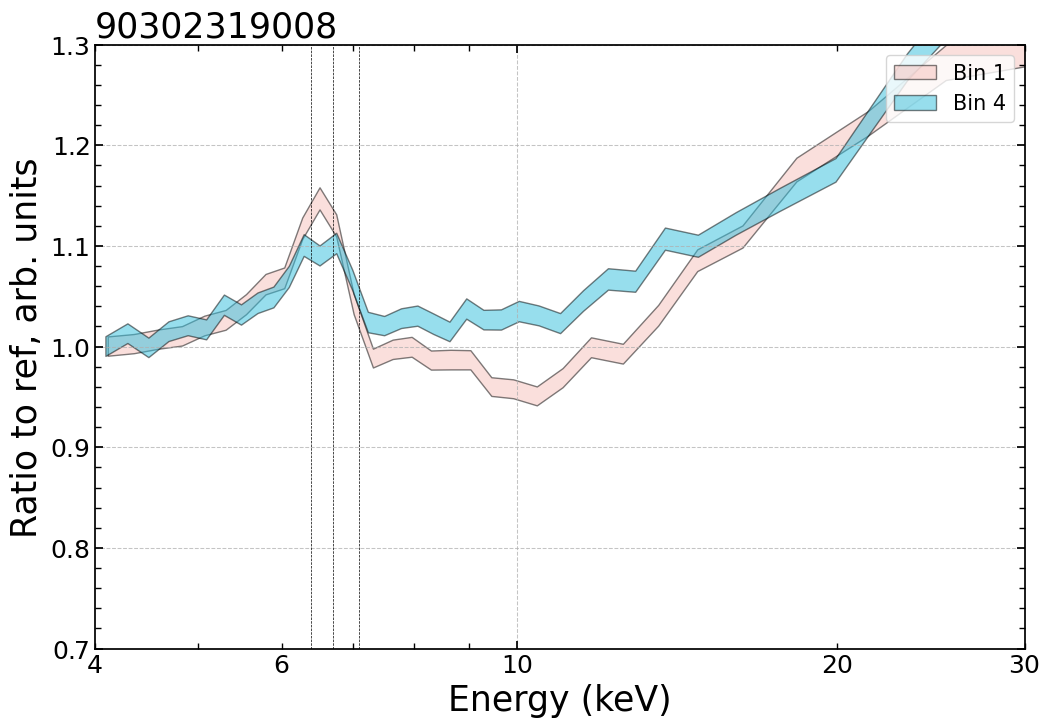

In [ ]:
from python_for_nustar.nu_core import plot_spe_ratio

mo_cutoffpl = Model("cutoffpl")
mo_cutoffpl.cutoffpl.PhoIndex = '1.1 -1'
mo_cutoffpl.cutoffpl.HighECut = '17 -1' # ,, 0.1, 0.2, 3, 4'

fig = plot_spe_ratio(model = mo_cutoffpl, ph_res_folder = ph_res_folder, bins_number=[1, 4], zoom_rat = [0.7, 1.3], title = ObsID, min_sig=100, min_bin = 100)

In [ ]:
# #bins = ['6', '4', '9']
# bins = ['6', '9']
# fig = make_grppha_and_wd(folder=ph_res_folder+'/', pha_files=[
#     f'phase_resolved_bin{bin}A_sr.pha' for bin in bins], NCHAN_1=5, NCHAN_2=25, en_split=10., labels=[f'bin {bin}' for bin in bins], title=ObsID)
# fig.savefig(ph_res_folder+'/xspec/ph_res_spe_ratio.png')


